In [1]:
import os
import pickle as pkl

import matplotlib.pyplot as plt
import numpy as np
import torch

/home/pierre/miniconda3/envs/fsdiff/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [72]:
dataset1 = 'DOTA_val'
dataset2 = 'DIOR_val'

paths = {'IN weights': os.path.join('../inter_class_IN', dataset1 + 'x' + dataset2),
         'COCO weights': os.path.join('../inter_class_COCO', dataset1 + 'x' + dataset2)}

dataset_size1 = 16
dataset_size2 = 20

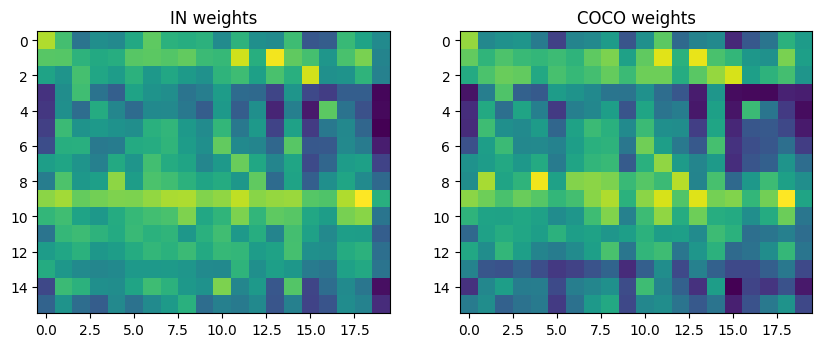

In [78]:
norm = 'none' # 'col' / 'row-soft' / 'col-soft'
tau = 1
fig, axs = plt.subplots(1,2, figsize=(10,15))
for idx_path, (title, path) in enumerate(paths.items()):
    heatmap = np.zeros((dataset_size1, dataset_size2))
    ax = axs[idx_path]
    ax.set_title(title)
    for i in range(dataset_size1):
        for j in range(dataset_size2):
            with open(os.path.join(path, dataset1 + str(i) + 'x' + dataset2 + str(j) + '_cov.pkl'), 'rb') as f:
                heatmap[i, j] = pkl.load(f)
    if norm == 'col':
        # for i in range(dataset_size1):
        #     heatmap[i, :] = (heatmap[i, :] - heatmap[i, :].min()) / (heatmap[i, :].max() - heatmap[i, :].min())
        heatmap = (heatmap - heatmap.min(axis=0))/ (heatmap.max(axis=0) - heatmap.min(axis=0))
    elif norm == 'row':
        heatmap = (heatmap - heatmap.min(axis=1)[:,None])/ (heatmap.max(axis=1) - heatmap.min(axis=1))[:,None]
        # for j in range(dataset_size2):
        #     heatmap[:, j] = (heatmap[:, j] - heatmap[:, j].min()) / (heatmap[:, j].max() - heatmap[:, j].min())
    elif norm == 'col-soft':
        heatmap = torch.tensor(heatmap)/tau
        heatmap = torch.softmax(heatmap, dim=0)
    elif norm == 'row-soft':  
        heatmap = torch.tensor(heatmap)/tau
        heatmap = torch.softmax(heatmap, dim=1)
    
    
    ax.imshow(heatmap)

In [87]:
class_probability = torch.softmax(torch.tensor(heatmap), dim=0)

entropy = -class_probability * torch.log(class_probability)
entropy = entropy.sum(dim=0).mean()

In [88]:
entropy

tensor(2.7706, dtype=torch.float64)

In [89]:
class_probability.shape

torch.Size([16, 20])

In [63]:
a / a.norm(dim=1)[:,None]

tensor([[0.0523, 0.0214, 0.0495,  ..., 0.0146, 0.0118, 0.0051],
        [0.0186, 0.0136, 0.0442,  ..., 0.0218, 0.0052, 0.0485],
        [0.0427, 0.0272, 0.0297,  ..., 0.0066, 0.0224, 0.0341],
        ...,
        [0.0335, 0.0502, 0.0412,  ..., 0.0385, 0.0314, 0.0319],
        [0.0518, 0.0417, 0.0184,  ..., 0.0133, 0.0343, 0.0233],
        [0.0383, 0.0254, 0.0232,  ..., 0.0182, 0.0091, 0.0144]])

In [61]:
a.norm(dim=1).shape

torch.Size([138])